# Loan prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Tapomayee Basu\\Downloads\\Loan Predicton Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,Y


In [3]:
df.shape

(981, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             981 non-null    object 
 1   Gender              957 non-null    object 
 2   Married             978 non-null    object 
 3   Dependents          956 non-null    float64
 4   Education           981 non-null    object 
 5   Self_Employed       926 non-null    object 
 6   Applicant_Income    981 non-null    int64  
 7   Coapplicant_Income  981 non-null    float64
 8   LoanAmount          954 non-null    float64
 9   Loan_Amount_Term    961 non-null    float64
 10  Credit_History      902 non-null    float64
 11  Property_Area       981 non-null    object 
 12  Loan_Status         981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [6]:
df.describe()

,Dependents,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History
count,956.000000,981.000000,981.000000,954.000000,961.000000,902.000000
mean,0.790795,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,1.038605,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000
25%,0.000000,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,2.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [8]:
df['Dependents'] = df['Dependents'].astype('O')

In [9]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,981,957,978,956.0,981,926,902.0,981,981
unique,981,2,2,4.0,2,2,2.0,3,2
top,LP002305,Male,Yes,0.0,Graduate,No,1.0,Semiurban,Y
freq,1,775,631,544.0,763,807,754.0,349,721


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             981 non-null    object 
 1   Gender              957 non-null    object 
 2   Married             978 non-null    object 
 3   Dependents          956 non-null    object 
 4   Education           981 non-null    object 
 5   Self_Employed       926 non-null    object 
 6   Applicant_Income    981 non-null    int64  
 7   Coapplicant_Income  981 non-null    float64
 8   LoanAmount          954 non-null    float64
 9   Loan_Amount_Term    961 non-null    float64
 10  Credit_History      902 non-null    object 
 11  Property_Area       981 non-null    object 
 12  Loan_Status         981 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 99.8+ KB


In [11]:
df.drop('Loan_ID', axis=1, inplace=True)

In [12]:
df.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
Applicant_Income       0
Coapplicant_Income     0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status            0
dtype: int64

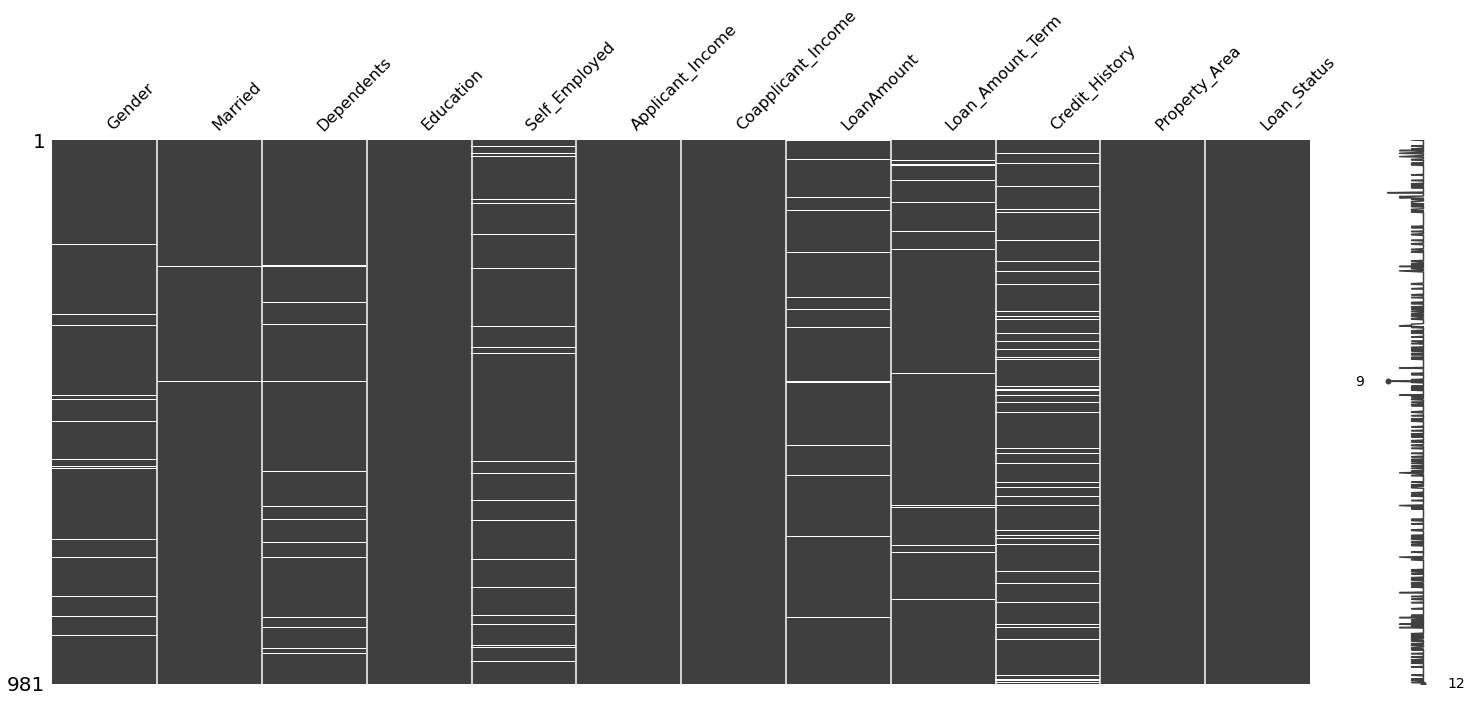

In [13]:
msno.matrix(df)
plt.show()

### Types of variables

In [14]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['Applicant_Income', 'Coapplicant_Income', 'LoanAmount', 'Loan_Amount_Term']


In [15]:
df[numerical].head()

,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [16]:
df[numerical].isnull().sum()

Applicant_Income       0
Coapplicant_Income     0
LoanAmount            27
Loan_Amount_Term      20
dtype: int64

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)

In [18]:
df[numerical].isnull().sum()

Applicant_Income      0
Coapplicant_Income    0
LoanAmount            0
Loan_Amount_Term      0
dtype: int64

In [19]:
# finding categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 8 categorical variables

The categorical variables are : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


In [20]:
df[categorical].head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [21]:
df[categorical].isnull().sum()

Gender            24
Married            3
Dependents        25
Education          0
Self_Employed     55
Credit_History    79
Property_Area      0
Loan_Status        0
dtype: int64

In [22]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)
df['Married'].fillna(df['Married'].mode()[0], inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace= True)

In [23]:
df[categorical].isnull().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [24]:
#checking for carinality of categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Gender  contains  2  labels
Married  contains  2  labels
Dependents  contains  4  labels
Education  contains  2  labels
Self_Employed  contains  2  labels
Credit_History  contains  2  labels
Property_Area  contains  3  labels
Loan_Status  contains  2  labels


## Univariate analysis

### 1. Analyzing the categorical variables

#### Exploring the target variable loan status 

In [25]:
#viewing the unique values

df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

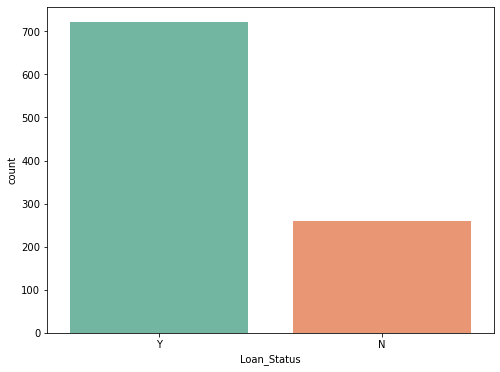

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'], palette = "Set2")

In [27]:
#calculating no of entries

df['Loan_Status'].value_counts()

Y    721
N    260
Name: Loan_Status, dtype: int64

In [28]:
df['Loan_Status'].value_counts()/len(df)

Y    0.734964
N    0.265036
Name: Loan_Status, dtype: float64

#### Exploring other categorical variables

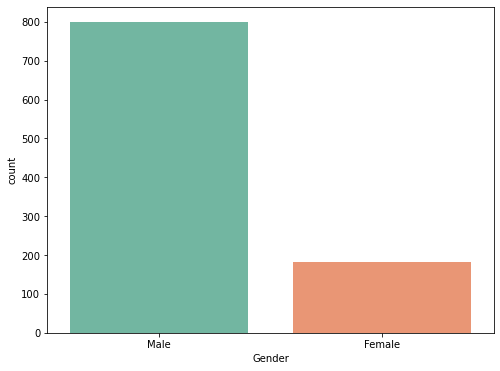

In [29]:
#Gender

plt.figure(figsize=(8,6))
sns.countplot(df['Gender'], palette = "Set2")

In [30]:
df['Gender'].value_counts()/len(df)

Male      0.814475
Female    0.185525
Name: Gender, dtype: float64

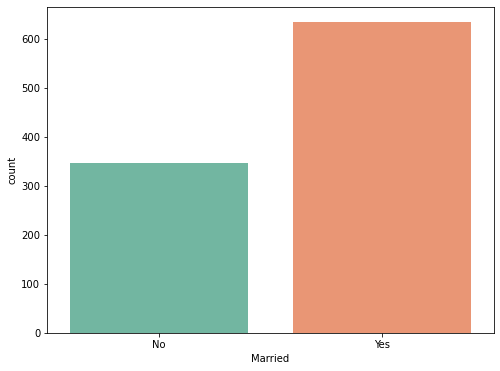

In [31]:
#married

plt.figure(figsize=(8,6))
sns.countplot(df['Married'], palette = "Set2")

In [32]:
df['Married'].value_counts()/len(df)

Yes    0.646279
No     0.353721
Name: Married, dtype: float64

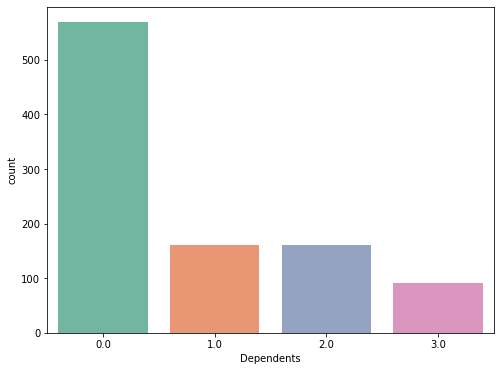

In [33]:
#dependents

plt.figure(figsize=(8,6))
sns.countplot(df['Dependents'], palette = "Set2")

In [34]:
df['Dependents'].value_counts()/len(df)

0.0    0.580020
2.0    0.163099
1.0    0.163099
3.0    0.093782
Name: Dependents, dtype: float64

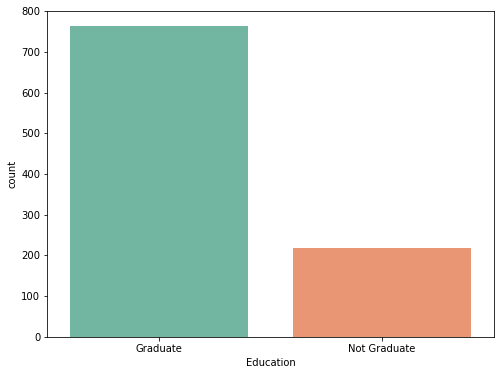

In [35]:
#education

plt.figure(figsize=(8,6))
sns.countplot(df['Education'], palette = "Set2")

In [36]:
df['Education'].value_counts()/len(df)

Graduate        0.777778
Not Graduate    0.222222
Name: Education, dtype: float64

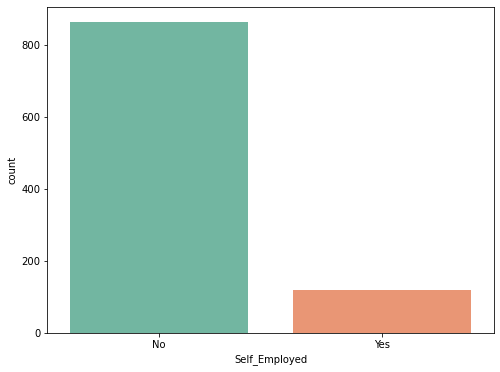

In [37]:
#employment

plt.figure(figsize=(8,6))
sns.countplot(df['Self_Employed'], palette = "Set2")

In [38]:
df['Self_Employed'].value_counts()/len(df)

No     0.878695
Yes    0.121305
Name: Self_Employed, dtype: float64

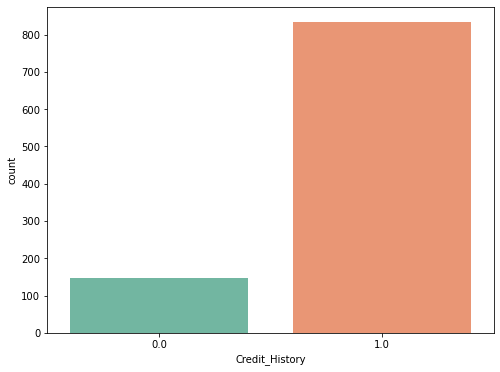

In [39]:
#credit-history

plt.figure(figsize=(8,6))
sns.countplot(df['Credit_History'], palette = "Set2")

In [40]:
df['Credit_History'].value_counts()/len(df)

1.0    0.849134
0.0    0.150866
Name: Credit_History, dtype: float64

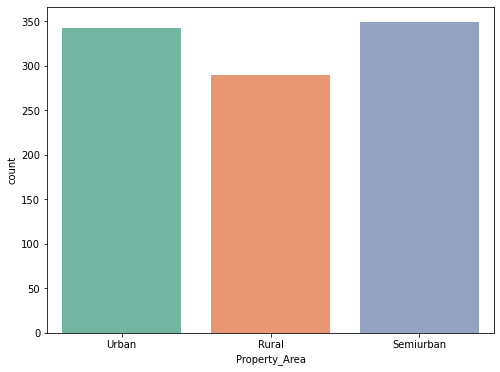

In [41]:
#property-area

plt.figure(figsize=(8,6))
sns.countplot(df['Property_Area'], palette = "Set2")

In [42]:
df['Property_Area'].value_counts()/len(df)

Semiurban    0.355759
Urban        0.348624
Rural        0.295617
Name: Property_Area, dtype: float64

#### Exploring numerical variables

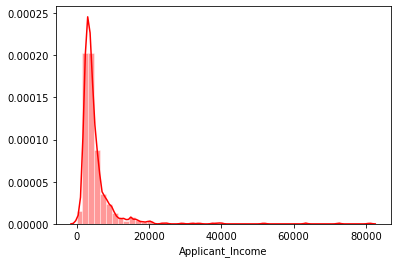

In [43]:
#applicant_income

sns.distplot(a=df.Applicant_Income, color='red',
             hist_kws={"edgecolor": 'white'})
plt.show()

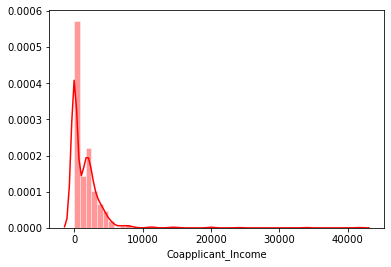

In [44]:
#Coapplicant_income

sns.distplot(a=df.Coapplicant_Income, color='red',
             hist_kws={"edgecolor": 'white'})
plt.show()

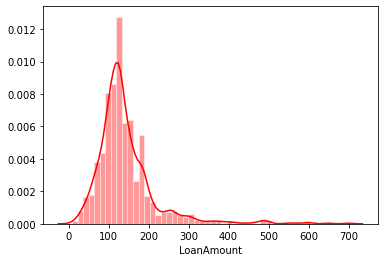

In [45]:
#Loan_amount

sns.distplot(a=df.LoanAmount, color='red',
             hist_kws={"edgecolor": 'white'})
plt.show()

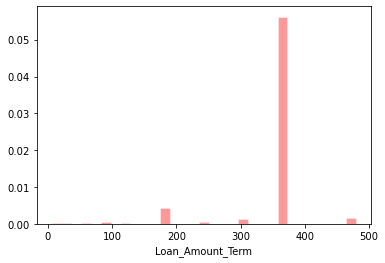

In [46]:
#Loan_amount_term

sns.distplot(a=df.Loan_Amount_Term, color='red',
             hist_kws={"edgecolor": 'white'})
plt.show()

#### Outlier detection

Text(0.5, 1.0, 'Coapplicant_Income')

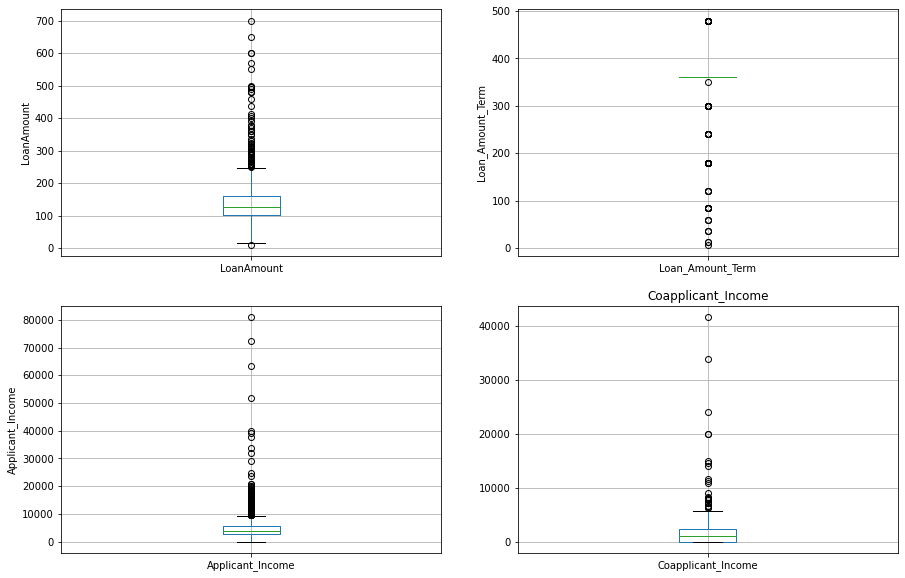

In [47]:
#boxplot

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='LoanAmount')
fig.set_title('')
fig.set_ylabel('LoanAmount')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Loan_Amount_Term')
fig.set_title('')
fig.set_ylabel('Loan_Amount_Term')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Applicant_Income')
fig.set_title('')
fig.set_ylabel('Applicant_Income')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='Coapplicant_Income')
fig.set_title('')
fig.set_title('Coapplicant_Income')

Since the variables are skewed. So we will use Interquartile range to find outliers.

In [48]:
# find outliers and removing them for LoanAmount variable

IQR = df.LoanAmount.quantile(0.75) - df.LoanAmount.quantile(0.25)
Lower_fence = df.LoanAmount.quantile(0.25) - (IQR * 3)
Upper_fence = df.LoanAmount.quantile(0.75) + (IQR * 3)
print('LoanAmount outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

LoanAmount outliers are values < -76.0 or > 337.0


In [49]:
df2 = df[(df.LoanAmount > Lower_fence)&(df.LoanAmount < Upper_fence)]

In [50]:
IQR = df2.Applicant_Income.quantile(0.75) - df2.Applicant_Income.quantile(0.25)
Lower_fence = df2.Applicant_Income.quantile(0.25) - (IQR * 3)
Upper_fence = df2.Applicant_Income.quantile(0.75) + (IQR * 3)
print('ApplicantIncome outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

ApplicantIncome outliers are values < -4534.5 or > 12682.0


In [51]:
df3 = df2[(df2.Applicant_Income > Lower_fence)&(df2.Applicant_Income < Upper_fence)]

In [52]:
IQR = df3.Coapplicant_Income.quantile(0.75) - df3.Coapplicant_Income.quantile(0.25)
Lower_fence = df3.Coapplicant_Income.quantile(0.25) - (IQR * 3)
Upper_fence = df3.Coapplicant_Income.quantile(0.75) + (IQR * 3)
print('CoapplicantIncome outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

CoapplicantIncome outliers are values < -7103.25 or > 9471.0


In [53]:
df4 = df3[(df3.Coapplicant_Income > Lower_fence)&(df3.Coapplicant_Income < Upper_fence)]

In [54]:
df4.shape

(918, 12)

## Bivariate analysis

#### 1. Categorical variable vs Target

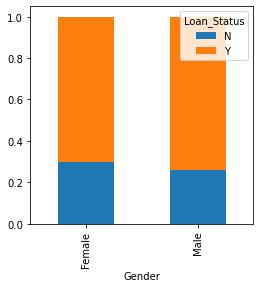

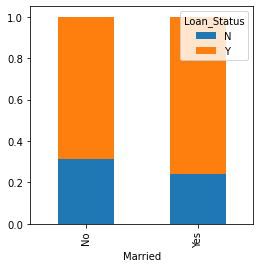

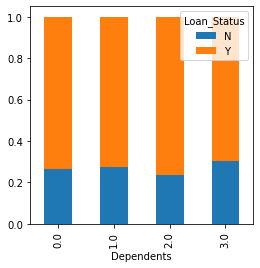

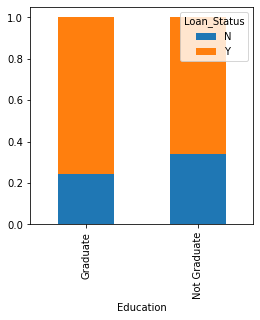

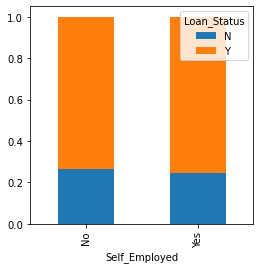

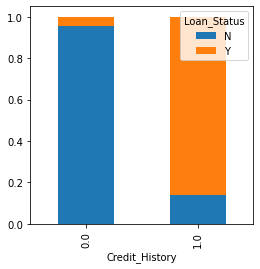

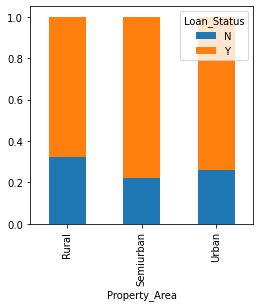

In [55]:
Gender=pd.crosstab(df4['Gender'],df4['Loan_Status']) 
Married=pd.crosstab(df4['Married'],df4['Loan_Status']) 
Dependents=pd.crosstab(df4['Dependents'],df4['Loan_Status']) 
Education=pd.crosstab(df4['Education'],df4['Loan_Status']) 
Self_Employed=pd.crosstab(df4['Self_Employed'],df4['Loan_Status']) 
Credit_History=pd.crosstab(df4['Credit_History'],df4['Loan_Status']) 
Property_Area=pd.crosstab(df4['Property_Area'],df4['Loan_Status']) 

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True, figsize=(4,4))
plt.show()
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True, figsize=(4,4))
plt.show()
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

#### 2. Numerical variable vs Target

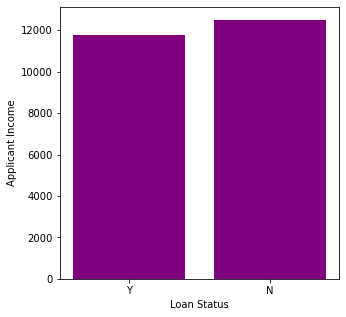

In [56]:
plt.figure(figsize=(5,5))
plt.bar(df4.Loan_Status, df4.Applicant_Income, color ='purple')
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")
plt.show()

In [57]:
bins=[0,2500,5000,7500,81000]
group=['Low','Average','High', 'Very high'] 
df4['Income_bin']=pd.cut(df4['Applicant_Income'],bins,labels=group)

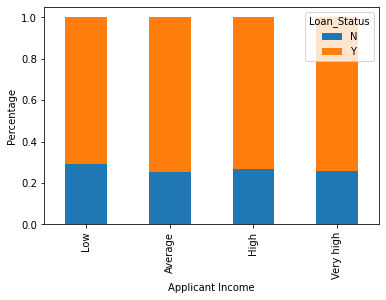

In [58]:
Income_bin=pd.crosstab(df4['Income_bin'],df4['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Applicant Income') 
P = plt.ylabel('Percentage')

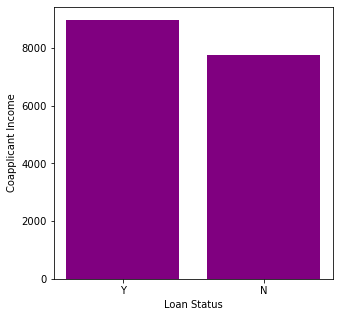

In [59]:
plt.figure(figsize=(5,5))
plt.bar(df4.Loan_Status, df4.Coapplicant_Income, color ='purple')
plt.xlabel("Loan Status")
plt.ylabel("Coapplicant Income")
plt.show()

In [60]:
bins=[0,2000,4000,42000]
group=['Low','Average','High'] 
df4['Coapplicant_Income_bin']=pd.cut(df4['Coapplicant_Income'],bins,labels=group)

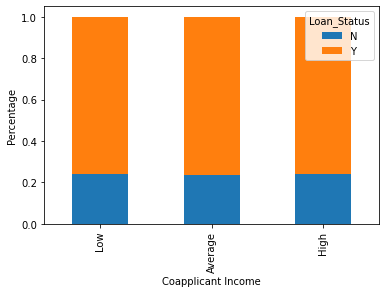

In [61]:
Coapplicant_Income_bin=pd.crosstab(df4['Coapplicant_Income_bin'],df4['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Coapplicant Income') 
P = plt.ylabel('Percentage')

In [62]:
df4['Total_Income']=df4['Applicant_Income']+df4['Coapplicant_Income']

In [63]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
df4['Total_Income_bin']=pd.cut(df4['Total_Income'],bins,labels=group)

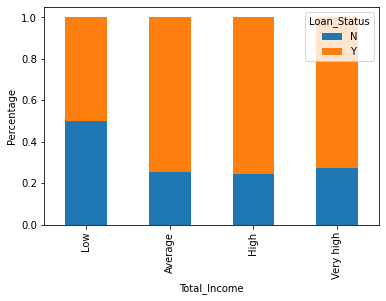

In [64]:
Total_Income_bin=pd.crosstab(df4['Total_Income_bin'],df4['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

In [65]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
df4['LoanAmount_bin']=pd.cut(df4['LoanAmount'],bins,labels=group)

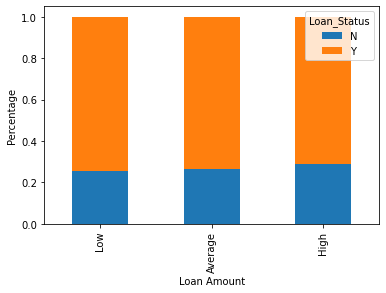

In [66]:
LoanAmount_bin=pd.crosstab(df4['LoanAmount_bin'],df4['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Loan Amount') 
P = plt.ylabel('Percentage')

In [67]:
df4 = df4.drop(['Income_bin', 'Coapplicant_Income_bin','LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

#### Encoding categorical data

In [68]:
df_x = df4.drop(['Loan_Status'],axis = 1)

In [69]:
dff = pd.get_dummies(df_x , drop_first = True)
dff.head()

,Dependents,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


## Multivariate analysis

In [70]:
num_var = ['Applicant_Income','Coapplicant_Income','LoanAmount','Loan_Amount_Term']

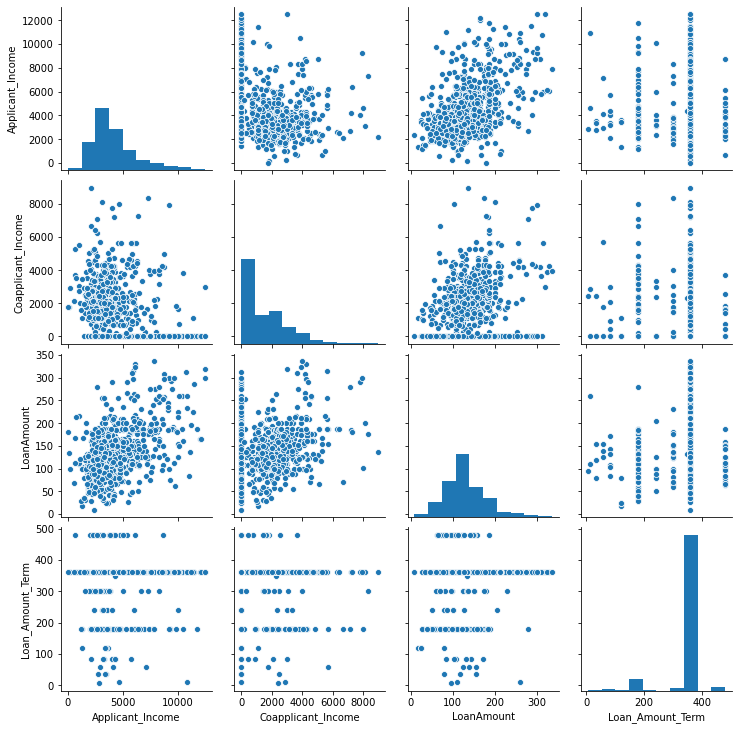

In [71]:
sns.pairplot(df4[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

Text(0.5, 1.0, 'Correlation heatmap')

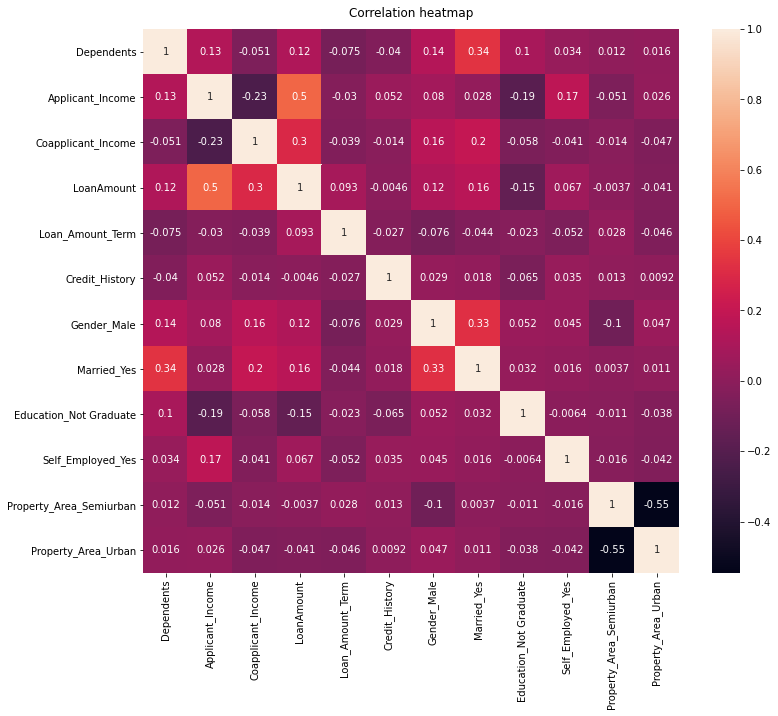

In [72]:
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(dff.corr(), annot = True)
heatmap.set_title('Correlation heatmap', fontdict = {'fontsize':12}, pad = 12)

## Model building

#### Declare the covariates and target variable

In [73]:
X = dff
y = df4['Loan_Status']

In [74]:
X.head()

,Dependents,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [75]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

#### Splitting the dataset into train and test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [77]:
X_train.shape , X_test.shape

((642, 12), (276, 12))

#### Feature scaling

In [78]:
X_train.describe()

,Dependents,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,0.769470,4283.247664,1406.286791,132.711838,342.423676,0.834891,0.822430,0.671340,0.241433,0.112150,0.364486,0.334891
std,1.034417,2107.407271,1606.388636,50.586169,65.746603,0.371568,0.382448,0.470093,0.428286,0.315796,0.481661,0.472320
min,0.000000,210.000000,0.000000,9.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2807.500000,0.000000,102.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3750.000000,1094.500000,126.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5179.750000,2381.000000,158.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,12500.000000,8980.000000,336.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
cols = X_train.columns

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [81]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [82]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [83]:
X_train.describe()

,Dependents,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,0.256490,0.331428,0.156602,0.378324,0.709755,0.834891,0.822430,0.671340,0.241433,0.112150,0.364486,0.334891
std,0.344806,0.171473,0.178885,0.154698,0.138706,0.371568,0.382448,0.470093,0.428286,0.315796,0.481661,0.472320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.211351,0.000000,0.284404,0.746835,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.288039,0.121882,0.357798,0.746835,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.404373,0.265145,0.455657,0.746835,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model training

### Logistic Regression

In [84]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = LR.predict(X_test)

In [86]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 33  37]
 [  2 204]]


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.94      0.47      0.63        70
           Y       0.85      0.99      0.91       206

    accuracy                           0.86       276
   macro avg       0.89      0.73      0.77       276
weighted avg       0.87      0.86      0.84       276



In [88]:
LR_SC = accuracy_score(y_pred,y_test)
print(f"The Logistic Regression Model is {round(LR_SC*100,2)}% Accurate.")

The Logistic Regression Model is 85.87% Accurate.


In [89]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [90]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9429


In [91]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1535


In [92]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8465


In [93]:
y_pred_prob = LR.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.1767333 , 0.8232667 ],
       [0.0963835 , 0.9036165 ],
       [0.16030844, 0.83969156],
       [0.14547643, 0.85452357],
       [0.91972809, 0.08027191],
       [0.15243707, 0.84756293],
       [0.16089427, 0.83910573],
       [0.18740865, 0.81259135],
       [0.12295028, 0.87704972],
       [0.16436212, 0.83563788]])

In [94]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No loan approved (0)', 'Prob of - Loan approved (1)'])

y_pred_prob_df

,Prob of - No loan approved (0),Prob of - Loan approved (1)
0,0.176733,0.823267
1,0.096383,0.903617
2,0.160308,0.839692
3,0.145476,0.854524
4,0.919728,0.080272
5,0.152437,0.847563
6,0.160894,0.839106
7,0.187409,0.812591
8,0.122950,0.877050
9,0.164362,0.835638


In [95]:
Cross_validated_ROC_AUC = cross_val_score(LR, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8079


In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.86153846 0.86153846 0.859375   0.875      0.921875   0.875
 0.921875   0.875      0.875      0.90625   ]


In [97]:
mean_SC = scores.mean()

In [98]:
print('Average cross-validation score:{:.4f}'.format(scores.mean()))

Average cross-validation score:0.8832


### Decision tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 100)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [100]:
y_pred = DT.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 36  34]
 [ 24 182]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.60      0.51      0.55        70
           Y       0.84      0.88      0.86       206

    accuracy                           0.79       276
   macro avg       0.72      0.70      0.71       276
weighted avg       0.78      0.79      0.78       276



In [103]:
DT_SC = accuracy_score(y_pred,y_test)
print(f"The Decision Tree Model is {round(DT_SC*100,2)}% Accurate.")

The Decision Tree Model is 78.99% Accurate.


### Random forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 123)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

In [105]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 33  37]
 [  4 202]]


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.89      0.47      0.62        70
           Y       0.85      0.98      0.91       206

    accuracy                           0.85       276
   macro avg       0.87      0.73      0.76       276
weighted avg       0.86      0.85      0.83       276



In [107]:
RF_SC = accuracy_score(y_pred,y_test)
print(f"The Random Forest Model is {round(RF_SC*100,2)}% accurate.")

The Random Forest Model is 85.14% accurate.


### KNN neighbor

In [108]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

In [109]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 32  38]
 [  8 198]]


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.80      0.46      0.58        70
           Y       0.84      0.96      0.90       206

    accuracy                           0.83       276
   macro avg       0.82      0.71      0.74       276
weighted avg       0.83      0.83      0.82       276



In [111]:
KNN_SC = accuracy_score(y_pred,y_test)
print(f"The KNN Model is {round(KNN_SC*100,2)}% accurate.")

The KNN Model is 83.33% accurate.


## Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB
NBC=GaussianNB()
NBC.fit(X_train,y_train)

GaussianNB()

In [113]:
y_pred=NBC.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 33  37]
 [  3 203]]


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.92      0.47      0.62        70
           Y       0.85      0.99      0.91       206

    accuracy                           0.86       276
   macro avg       0.88      0.73      0.77       276
weighted avg       0.86      0.86      0.84       276



In [115]:
NBC_SC = accuracy_score(y_pred,y_test)
print(f"The NBC Model is {round(NBC_SC*100,2)}% accurate.")

The NBC Model is 85.51% accurate.


## Model comparison

In [116]:
data={'Models':['Logistic Regression','Random Forest','Decision Tree','K Nearest Neighbor','Naive Bayes Classifier'],'Accuracy':[mean_SC,RF_SC,DT_SC,KNN_SC,NBC_SC]}
accuracies=pd.DataFrame(data,index=[1,2,3,4,5])
accuracies

,Models,Accuracy
1,Logistic Regression,0.883245
2,Random Forest,0.851449
3,Decision Tree,0.789855
4,K Nearest Neighbor,0.833333
5,Naive Bayes Classifier,0.855072
